In [ ]:
import matplotlib

In [1]:
data = open('../../auto_search/09_final_search_results.jsonl').readlines()
import json
data = [json.loads(line) for line in data]

In [2]:
dois = [d['prism:doi'] for d in data]
print(*dois, sep='\n')

10.1016/j.ijepes.2024.110364
10.1016/j.comcom.2024.01.024
10.1016/j.hcc.2023.100194
10.1016/j.asej.2023.102356
10.1016/j.egypro.2012.01.152
10.1016/j.mcm.2010.03.030
10.1016/j.procs.2020.02.067
10.1016/j.procs.2020.02.018
10.1016/j.procs.2016.03.111
10.1016/j.procs.2013.06.156
10.1016/j.procs.2015.06.005
10.1016/j.procs.2012.06.068
10.1016/j.camwa.2011.07.069
10.1016/j.procs.2020.04.195
10.1016/j.procs.2015.07.367
10.1016/j.proeng.2017.03.045
10.1016/j.comnet.2022.109114
10.1016/j.procs.2012.06.013
10.1016/j.procs.2018.03.024
10.1016/j.procs.2013.09.055
10.1016/S0304-3975(97)00198-9
10.1016/j.procs.2015.05.005
10.1016/j.procs.2014.08.028
10.1016/j.dcan.2016.06.001
10.1016/j.aasri.2013.10.054


In [3]:
import collections
years = collections.Counter()
for d in data:
    year = int(d['load-date'].split('-')[0])
    years[year] += 1

years

Counter({2012: 3,
         2020: 3,
         2013: 3,
         2015: 3,
         2024: 2,
         2023: 2,
         2016: 2,
         2010: 1,
         2011: 1,
         2017: 1,
         2022: 1,
         2018: 1,
         1998: 1,
         2014: 1})

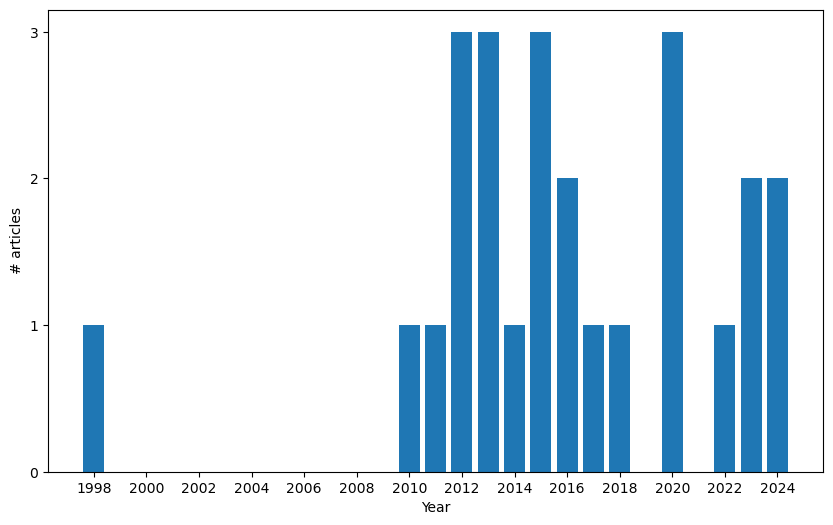

In [5]:
import matplotlib.pyplot
matplotlib.pyplot.bar(years.keys(), years.values())
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('# articles')

# show number as integer
matplotlib.pyplot.gca().yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

# show all years
matplotlib.pyplot.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2))

# Increase width
matplotlib.pyplot.gcf().set_size_inches(10, 6)

Counter({'China': 6, 'India': 5, 'Pakistan': 2, 'Canada': 2, 'Spain': 2, 'Ireland': 1, 'Indonesia': 1, 'United States': 1, 'Malaysia': 1, 'Algeria': 1, 'South Africa': 1, 'Jordan': 1, 'Australia': 1, 'Italy': 1, 'Brazil': 1, 'Sweden': 1})


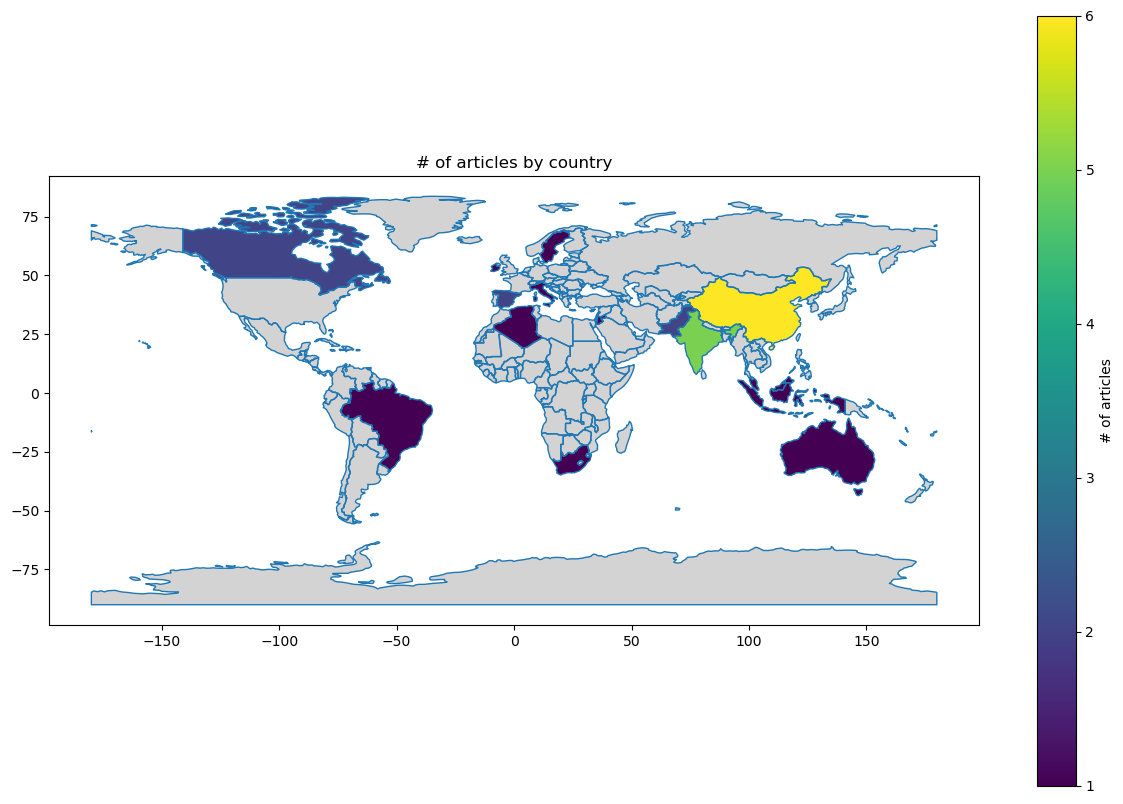

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
world = gpd.read_file("./assets/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

import pandas as pd

# Example data
countries = ['China', 'Pakistan', 'Ireland', 'China', 'Pakistan', 'Indonesia', 'India',
             'India', 'China', 'United States', 'India',
             'India', 'India', 'Malaysia', 'Algeria',
             'South Africa', 'Canada',
             'Jordan', 'China',
             'Spain', 'Australia',
             'China', 'Italy', 'Spain', 'China',
              'Canada',  'Brazil', 'Sweden' ]

countries = collections.Counter(countries)

#data = {
#    'country': ['United States', 'Canada', 'Brazil', 'United Kingdom', 'Germany'],
#    'value': [10, 20, 30, 40, 50]
#}

print(countries)
data = {
    'country': countries.keys(),
    'value': countries.values()
}

values_df = pd.DataFrame(data)
world = world.merge(values_df, how='left', left_on='ADMIN', right_on='country')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)  # Draw country boundaries

# Plot countries with a color map based on the 'value' column
world.plot(column='value', ax=ax, legend=True,

           legend_kwds={'label': "# of articles",
                        'orientation': "vertical"},
           cmap='viridis', missing_kwds={'color': 'lightgrey'})  # Color for missing values

plt.title('# of articles by country')
plt.show()

In [26]:
data

{'country': dict_keys(['China', 'Pakistan', 'Ireland', 'Indonesia', 'India', 'United States', 'Malaysia', 'Algeria', 'South Africa', 'Canada', 'Jordan', 'Spain', 'Australia', 'Italy', 'Brazil', 'Sweden']),
 'value': dict_values([6, 2, 1, 1, 5, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1])}